# **Multiple Linear Regression with Gradient Descent**



---

**Multi-Linear Regression** refers to the method used when there is more than one independent variable. Multi-Linear Regression can be written as below:


$$ \hat{y} = b + m_{1}X_{1} + m_{2}X_{2} + ... + m_{n}X_{n} $$


*where:*

*$\hat{y}:$ dependent variable (predicted value)*

*$ b :$ estimated intercept*

*$m_{i}X_{i}:$ estimated slope coefficient*

In this example we will try to use multi-linear regression to analyze the relationship of a product's price, advertisement cost, and the product sales number. We will also try to predict how much products will be sold given specific product's price and advertisement cost.

# Step 1: Data Preparation

In the cell code below, we will load some Python libraries we will be using, such as Pandas, NumPy, matplotlib, sklearn, etc. We will also load our dataset from GitHub into a dataframe called `df_pie` by using the Pandas library.

In [58]:
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
import random

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor


warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [59]:
# Load dataset
df_pie = pd.read_csv('data.csv', index_col='week', sep=',')
print(df_pie.shape)
df_pie

(15, 3)


,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


As seen above our dataset consist of 3 columns (pie_sales, price, and advertising) and 15 rows. We will try to predict how much pie will be sold depending on its price and advertisement cost.

# Step 2: Exploratory Data Analysis

Before going deeper into using multi-linear regression, it's always a good idea to simply visualize our data to understand it better and see if there are any relationship between each variable. To do this we will use the `pairplot()` function from the Seaborn library. The function will output a figure containing histogram and scatter plot between each variable.

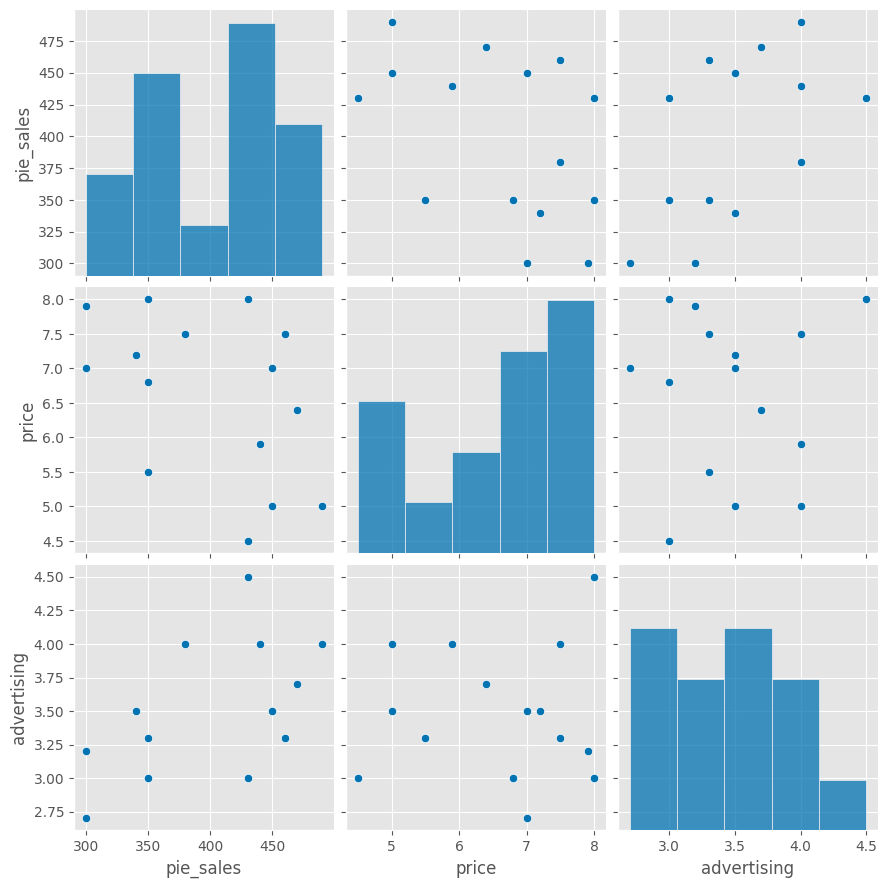

In [60]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_pie, height=3)

Looking at first row in the figures we can see that there might be relations between price, advertising, and pie_sales. The scatter plot between pie sales and price display pattern of negative relation, which means the higher the price the lower the sales will be. In the other hand the scatter plot between advertising and pie sales display a positive relation, the more money we spent on advertising the more pie we will sells.

### Multicollinearity

This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data using the `corr()` function from Pandas dataframe. Then we can display it as a heatmap using `heatmap()` function from Seaborn.

In [61]:
correlation = df_pie.corr()
print('Pearson correlation coefficient matrix of each variables:\n', correlation)

Pearson correlation coefficient matrix of each variables:
              pie_sales     price  advertising
pie_sales     1.000000 -0.443273     0.556320
price        -0.443273  1.000000     0.030438
advertising   0.556320  0.030438     1.000000


<Axes: >

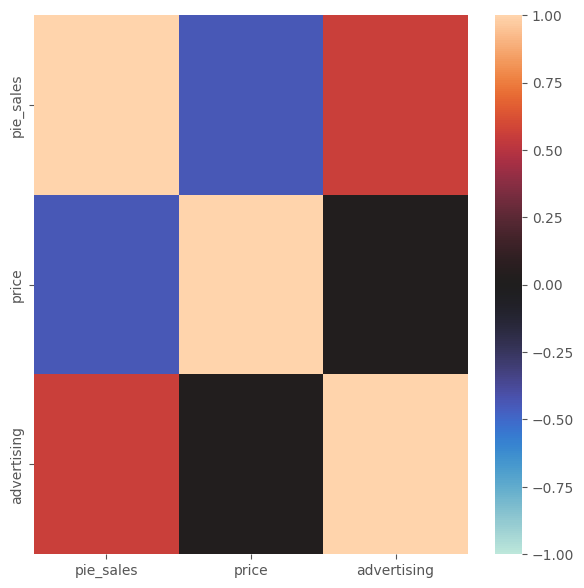

In [62]:
sns.heatmap(correlation, vmin=-1, vmax=1, center=0)

The image shows that there are some positive relationship between advertising and pie_sales and a negative relationship between price and pie_sales. Both of this result support our resulting model from before. Most importanly, notice how the price and advertising have almost 0 correlation coefficient. **This means both of our independent variable are not affecting each other and that there is no multicollinearity in our data.**

# Step 3: Building the Model

Since we already see that there might be relations between our independent and dependent variables, let's continue to building our regression model. We will use the `LinearRegression()` function from the sklearn library to build our models.

In [63]:
# Set independent and dependent variables
X = df_pie[['price', 'advertising']].values
y = df_pie['pie_sales'].values

In [64]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s
   
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

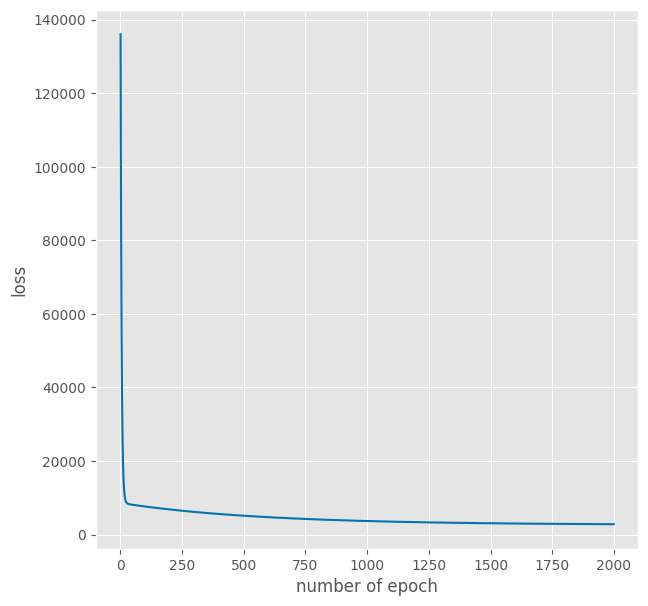

In [65]:
m,b = gradient_descent(X,y)

In [66]:
print("m is: " , m)
print("b is :" , b)

m is:  [ -0.64218705 105.67522873]
b is : 31.680070947163365


In [67]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(m@inp[i]+b)
    return np.array(y_lst)

In [68]:
y_pred=predict(X)
y_pred

array([376.87629695, 375.59192284, 343.56826069, 502.08110378,
       344.33888516, 449.56458295, 345.81591538, 418.56842009,
       397.04806211, 451.17005058, 396.9196247 , 364.76752514,
       450.59208223, 398.33243622, 312.50787913])

In [69]:
df_pred=pd.DataFrame()
df_pred["y_actual"]= y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,350,376.9
1,460,375.6
2,350,343.6
3,430,502.1
4,350,344.3
5,380,449.6
6,430,345.8
7,470,418.6
8,450,397.0
9,490,451.2


In [70]:
model=SGDRegressor(alpha=0, learning_rate="constant", eta0=0.001, max_iter=2000)
model.fit(X,y)

SGDRegressor(alpha=0, eta0=0.001, learning_rate='constant', max_iter=2000)

In [71]:
model.coef_

array([ 2.86491439, 99.83088112])

In [72]:
model.intercept_

array([28.72034412])